In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
imageSize = 256
batchSize = 32
channelSize = 3
epochs = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(imageSize, imageSize),
    batch_size=batchSize
)

Found 2152 files belonging to 3 classes.


In [4]:
classNames = dataset.class_names
classNames

['Early Blight', 'Healthy', 'Late Blight']

In [5]:
for imageBatch, labelBatch in dataset.take(1):
    print(imageBatch.shape)
    print(labelBatch.numpy())

(32, 256, 256, 3)
[2 0 2 2 2 0 2 0 0 0 2 0 1 0 2 0 2 2 0 1 2 1 2 2 2 0 2 2 0 0 2 1]


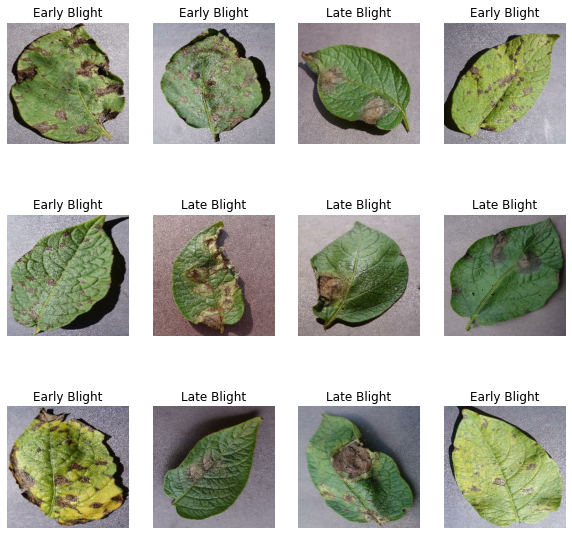

In [6]:
plt.figure(figsize=(10,10))
for imageBatch, labelBatch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(imageBatch[i].numpy().astype("uint8"))
        plt.title(classNames[labelBatch[i]])
        plt.axis("off")
    

In [7]:
trainingSize = 0.8
validationSize = 0.1
testSize = 0.1

In [8]:
training_ds = dataset.take(int(len(dataset) * trainingSize))

In [9]:
remaining_ds = dataset.skip(len(training_ds))

In [10]:
validation_ds = remaining_ds.take(int(len(remaining_ds) * 0.5))

In [11]:
test_ds = remaining_ds.skip(len(validation_ds))

In [12]:
def getDatasetPartitions(ds, shuffle=True, shuffleSize=1000, trainingSize = 0.8, validationSize = 0.1, testSize = 0.1):
    if shuffle:
        ds = ds.shuffle(shuffleSize, seed=12)
    training_ds = ds.take(int(len(ds) * trainingSize))
    remaining_ds = ds.skip(len(training_ds))
    validation_ds = ds.take(int(len(ds) * validationSize))
    test_ds = remaining_ds.skip(len(validation_ds))
    return training_ds, validation_ds, test_ds

In [13]:
training_ds, validation_ds, test_ds = getDatasetPartitions(dataset)

In [14]:
len(training_ds)

54

In [15]:
len(validation_ds)

6

In [16]:
len(test_ds)

8

In [17]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(imageSize, imageSize),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
no_of_classes = len(classNames)
inputShape = (batchSize, imageSize, imageSize, channelSize)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=inputShape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes, activation='softmax')
])

model.build(input_shape=inputShape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (32, 127, 127, 32)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)          0         
2D)                                                   

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    training_ds,
    
)